In [1]:
#1. Install necessary modules 

In [2]:
try:
    import tangelo
except ModuleNotFoundError:
    !pip install git+https://github.com/goodchemistryco/Tangelo.git@develop --quiet

# Download the data folder at https://github.com/goodchemistryco/Tangelo-Examples/tree/main/examples/chemistry/data
import os
if not os.path.isdir("data"):
    !sudo apt install git
    !git clone https://github.com/sandbox-quantum/Tangelo-Examples.git
    !mkdir data
    !cp -a Tangelo-Examples/examples/chemistry/data/. ./data/

In [3]:
!pip install --prefer-binary pyscf==2.3.0

In [4]:
#2. Setting up the LiH molecule 
    #Determining Appropriate basis sets
    #Optimize by choosing active orbitals

In [5]:
from tangelo import SecondQuantizedMolecule

LiH = [('Li', (0, 0, 0)), ('H', (0, 0, 1.5949))]
#specifying the spatial configuration of LiH
#Li and H nuclei separated by 1.5949Å along the z-axis

/home/jovyan/.qbraid/environments/haq_20_l45rb4/pyenv/lib/python3.11/site-packages/pyscf/dft/libxc.py:772: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, the same to the B3LYP functional in Gaussian and ORCA (issue 1480). To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


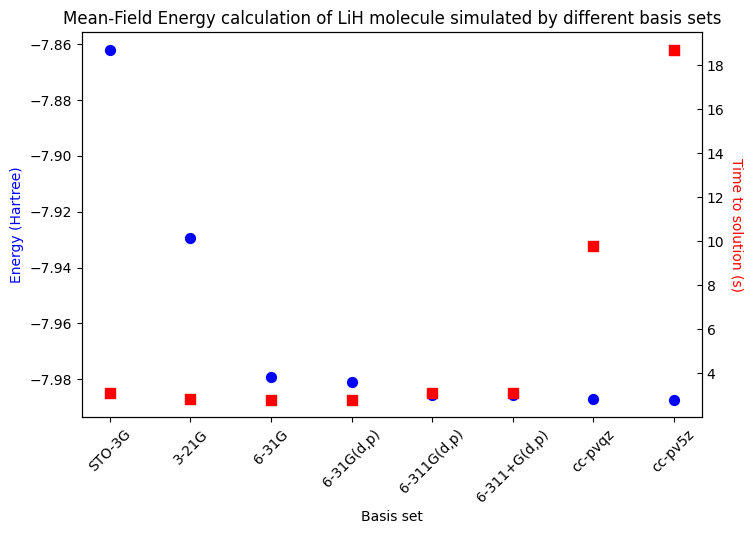

In [6]:
#Figuring out the most optimal basis sets to use to simulate LiH singlet state
#LiH Ground state case

basis_sets = [
    "STO-3G",       # Simple zeta, minimal basis.
    "3-21G",        # Double zeta.
    "6-31G",        # Double zeta with more Gaussian primitives.
    "6-31G(d,p)",   # Polarization functions (+ 5 d-orbitals for all atoms except H, +3 p-orbitals for H atoms) added.
    "6-311G(d,p)",  # Triple zeta with polarization functions.
    "6-311+G(d,p)", # Triple zeta with polarization functions and diffuse functions.
    "cc-pvqz",      # Quadruple zeta.
    "cc-pv5z"       # Quintuple zeta.
]
import matplotlib
import time
import matplotlib.pyplot as plt

mf_energies = list()
mf_times = list()

# Perform a Mean-Field calculation for each basis set.
for bs in basis_sets:

    # Measure execution time.
    start = time.time()
    scan_basis_mol = SecondQuantizedMolecule(LiH, q=0, spin=0, basis=bs)
    end = time.time()

    mf_energies.append(scan_basis_mol.mf_energy)
    mf_times.append(end-start)

# Create the matplotlib figure.
fig, ax = plt.subplots(figsize=(8,5))

# Plot the energies.
plt.title("Mean-Field Energy calculation of LiH molecule simulated by different basis sets")
ax.set_xticks(range(len(basis_sets)), basis_sets, rotation=45)
ax.set_xlabel("Basis set")
ax.set_ylabel("Energy (Hartree)", color="b")
#Hartree unit: unit of energy used in atomic physics/computational chemistry
#represents absolute value of the electric potential energy of an e- in a H atom in its ground state
ax.scatter(range(len(basis_sets)), mf_energies, marker="o", s=50, color="b")

# Plot the time to solution.
ax_time = ax.twinx()
ax_time.scatter(range(len(basis_sets)), mf_times, marker="s", s=50, color="r")
ax_time.set_ylabel("Time to solution (s)", color="r", rotation=270, va="bottom")

# Show the graph.
plt.tick_params(axis="both", direction="in")
plt.show()

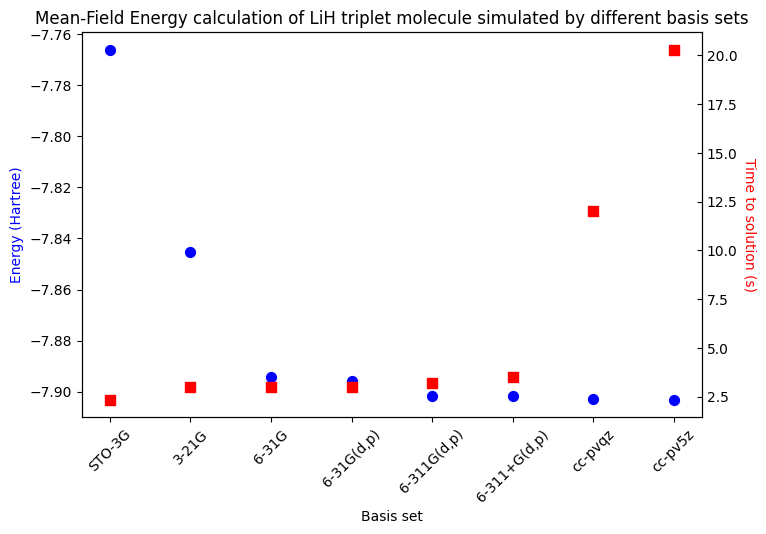

In [7]:
#Figuring out the most optimal basis sets to use to simulate LiH triplet state
#LiH Excited state case

basis_sets = [
    "STO-3G",       # Simple zeta, minimal basis.
    "3-21G",        # Double zeta.
    "6-31G",        # Double zeta with more Gaussian primitives.
    "6-31G(d,p)",   # Polarization functions (+ 5 d-orbitals for all atoms except H, +3 p-orbitals for H atoms) added.
    "6-311G(d,p)",  # Triple zeta with polarization functions.
    "6-311+G(d,p)", # Triple zeta with polarization functions and diffuse functions.
    "cc-pvqz",      # Quadruple zeta.
    "cc-pv5z"       # Quintuple zeta.
]

import time
import matplotlib.pyplot as plt

mf_energies = list()
mf_times = list()

# Perform a Mean-Field calculation for each basis set.
for bs in basis_sets:

    # Measure execution time.
    start = time.time()
    scan_basis_mol = SecondQuantizedMolecule(LiH, q=0, spin=2, basis=bs) #spin=2 triplet state with two unpaired e-, higher energy
    end = time.time()

    mf_energies.append(scan_basis_mol.mf_energy)
    mf_times.append(end-start)

# Create the matplotlib figure.
fig, ax = plt.subplots(figsize=(8,5))

# Plot the energies.
plt.title("Mean-Field Energy calculation of LiH triplet molecule simulated by different basis sets")
ax.set_xticks(range(len(basis_sets)), basis_sets, rotation=45)
ax.set_xlabel("Basis set")
ax.set_ylabel("Energy (Hartree)", color="b")
ax.scatter(range(len(basis_sets)), mf_energies, marker="o", s=50, color="b")

# Plot the time to solution.
ax_time = ax.twinx()
ax_time.scatter(range(len(basis_sets)), mf_times, marker="s", s=50, color="r")
ax_time.set_ylabel("Time to solution (s)", color="r", rotation=270, va="bottom")

# Show the graph.
plt.tick_params(axis="both", direction="in")
plt.show()

In [8]:
#Based on the graph, we will choose 6-311+G(d,p) as our basis sets
#Figuring out which orbitals to choose as our active orbitals

mol_LiH_test = SecondQuantizedMolecule(LiH, q=0, spin=0, basis='6-311+g(d,p)')

print("Ground state (singlet) LiH with 6-311+G(d,p) basis set")
print(f"\t{mol_LiH_test.n_active_mos} active molecular orbitals")
print(f"\t{mol_LiH_test.n_active_electrons} active electrons")

print("  #   Energy   Occ")
for i in range(5):
    print(f"{i:3d}{mol_LiH_test.mo_energies[i]: 9.4f}   {int(mol_LiH_test.mo_occ[i])}")



mol_LiH_t_test = SecondQuantizedMolecule(LiH, q=0, spin=2, basis='6-311+g(d,p)') #t stands for triplet (excited) state

print("\nExcited state (triplet) LiH with 6-311+G(d,p) basis set")
print(f"\t{mol_LiH_t_test.n_active_mos} active molecular orbitals")
print(f"\t{mol_LiH_t_test.n_active_electrons} active electrons")
print("  #   Energy   Occ")
for i in range(5):
    print(f"{i:3d}{mol_LiH_t_test.mo_energies[i]: 9.4f}   {int(mol_LiH_t_test.mo_occ[i])}")


Ground state (singlet) LiH with 6-311+G(d,p) basis set
	27 active molecular orbitals
	2 active electrons
  #   Energy   Occ
  0  -2.4474   2
  1  -0.3015   2
  2  -0.0072   0
  3   0.0152   0
  4   0.0152   0

Excited state (triplet) LiH with 6-311+G(d,p) basis set
	27 active molecular orbitals
	2 active electrons
  #   Energy   Occ
  0  -2.4832   2
  1  -0.3068   1
  2  -0.0471   1
  3   0.0093   0
  4   0.0143   0


In [9]:
#We define active orbitals to optimize our circuit and reduce runtime

#LiH ground
#Highest Ocuppied Molecular Orbital (HOMO): #2 orbital
#Loewest Unoccupied Molecular Orbital (LUMO): #3 Orbital

fo = [0] + [i for i in range(3,28)]
mol_LiH = SecondQuantizedMolecule(LiH, q=0, spin=0, basis='6-311+g(d,p)', frozen_orbitals=fo)
print("Ground state (singlet) LiH active orbital selection")
print(f"\t{mol_LiH.n_active_mos} active molecular orbitals and {mol_LiH.n_active_electrons} active electrons")


#LiH excited
#Highest Ocuppied Molecular Orbital (HOMO): #3 orbital
#Loewest Unoccupied Molecular Orbital (LUMO): #4 Orbital

fo_t = [0] + [i for i in range(4,28)]
mol_LiH_t = SecondQuantizedMolecule(LiH, q=0, spin=2, basis='6-311+g(d,p)', frozen_orbitals=fo_t)
print("Excited state (triplet) LiH active orbital selection")
print(f"\t{mol_LiH_t.n_active_mos} active molecular orbitals and {mol_LiH_t.n_active_electrons} active electrons")


Ground state (singlet) LiH active orbital selection
	2 active molecular orbitals and 2 active electrons
Excited state (triplet) LiH active orbital selection
	3 active molecular orbitals and 2 active electrons


In [10]:
#3. Implementing FCI to classically calculate ground state and excited state energy

In [11]:
from tangelo.algorithms import FCISolver

fci_solver = FCISolver(mol_LiH)
ground_energy_c = fci_solver.simulate()

fci_solver_t = FCISolver(mol_LiH_t)
excited_energy_c = fci_solver_t.simulate()

print("Classically computed energy values (atomic unit/hartree)")
print(f"\tground state (singlet): {ground_energy_c:2f}")
print(f"\texcited state (triplet): {excited_energy_c:2f}")

Classically computed energy values (atomic unit/hartree)
	ground state (singlet): -7.985817
	excited state (triplet): -7.901681


In [12]:
#4. Implementing VQE to calculate ground state and excited state energy via quantum algorithm

In [13]:
import warnings
warnings.filterwarnings("ignore")
#some ansatz doesn't have appropriate gates or can't compile and cause errors

In [14]:
import tangelo
from tangelo.algorithms import VQESolver
from tangelo.algorithms import BuiltInAnsatze

In [16]:
#trying different built in ansatz and comparing calculated energy to classical value to choose best ansatze

def get_ground_state_energy(ansatz_list):
    res = dict()
    for ansatz in ansatz_list:
        #print("Trying ansatz", ansatz)
        try:
            t0 = time.time()
        
            # Set up the VQE solver with the ansatz
            vqe_options_t = {"molecule": mol_LiH, "ansatz": ansatz, }
            #ansatz options: QCC can't find suitable generator; UCCSD can't find appropriate gates
            #vqe_options_t = {"molecule": mol_LiH_t}
            vqe_solver_t = VQESolver(vqe_options_t)
            vqe_solver_t.build()
            LiH_t_qubit_hamiltonian = vqe_solver_t.qubit_hamiltonian
            result_t = vqe_solver_t.simulate()
        
            tf = time.time()
            runtime = tf-t0
            
            res[ansatz] = (runtime, result_t)
        except Exception as e:
            None
            #print("exception occured during ansatz", ansatz, e)
        #print("Trial finished")
    return res

def get_excited_state_energy(ansatz_list):
    res = dict()
    for ansatz in ansatz_list:
        #print("Trying ansatz", ansatz)
        try:
            t0 = time.time()
        
            # Set up the VQE solver with the ansatz
            vqe_options_t = {"molecule": mol_LiH_t, "ansatz": ansatz, }
            #ansatz options: QCC can't find suitable generator; UCCSD can't find appropriate gates
            #vqe_options_t = {"molecule": mol_LiH_t}
            vqe_solver_t = VQESolver(vqe_options_t)
            vqe_solver_t.build()
            LiH_t_qubit_hamiltonian = vqe_solver_t.qubit_hamiltonian
            result_t = vqe_solver_t.simulate()
        
            tf = time.time()
            runtime = tf-t0
            
            res[ansatz] = (runtime, result_t)
        except Exception as e:
            None
            #print("exception occured during ansatz", ansatz, e)
        #print("Trial finished")
    return res

<class 'tangelo.toolboxes.operators.operators.FermionOperator'>
<class 'tangelo.toolboxes.operators.operators.QubitOperator'>
<class 'tangelo.toolboxes.operators.operators.FermionOperator'>
<class 'tangelo.toolboxes.operators.operators.QubitOperator'>


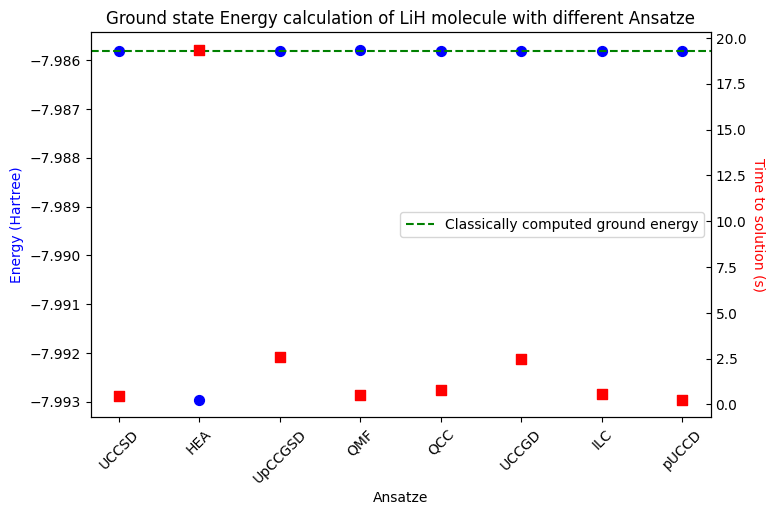

In [17]:
#Comparing VQE calculated ground state energy for different ansatze
result_s = get_ground_state_energy([x for x in BuiltInAnsatze if x is not BuiltInAnsatze.VSQS])#VSQS ansatze kept crashing kernel

fig, ax = plt.subplots(figsize=(8,5))

ansatz_ls = []
runtime_ls = []
exc_e_ls = []

for key, value in result_s.items():
    ansatz_ls.append(str(key)[15:])
    runtime_ls.append(value[0])
    exc_e_ls.append(value[1])
    

# Plot the energies.
plt.title("Ground state Energy calculation of LiH molecule with different Ansatze")
ax.set_xticks(range(len(ansatz_ls)), ansatz_ls, rotation=45)
ax.set_xlabel("Ansatze")
ax.set_ylabel("Energy (Hartree)", color="b")
plt.axhline(y=ground_energy_c, color="green", linestyle="--", label="Classically computed ground energy")
ax.scatter(range(len(exc_e_ls)), exc_e_ls, marker="o", s=50, color="b")


# Plot the time to solution.
ax_time = ax.twinx()
ax_time.scatter(range(len(runtime_ls)), runtime_ls, marker="s", s=50, color="r")
ax_time.set_ylabel("Time to solution (s)", color="r", rotation=270, va="bottom")

# Show the graph.
plt.tick_params(axis="both", direction="in")
ax.legend(loc='center right')
plt.show()

<class 'tangelo.toolboxes.operators.operators.FermionOperator'>
<class 'tangelo.toolboxes.operators.operators.QubitOperator'>
<class 'tangelo.toolboxes.operators.operators.FermionOperator'>
<class 'tangelo.toolboxes.operators.operators.QubitOperator'>


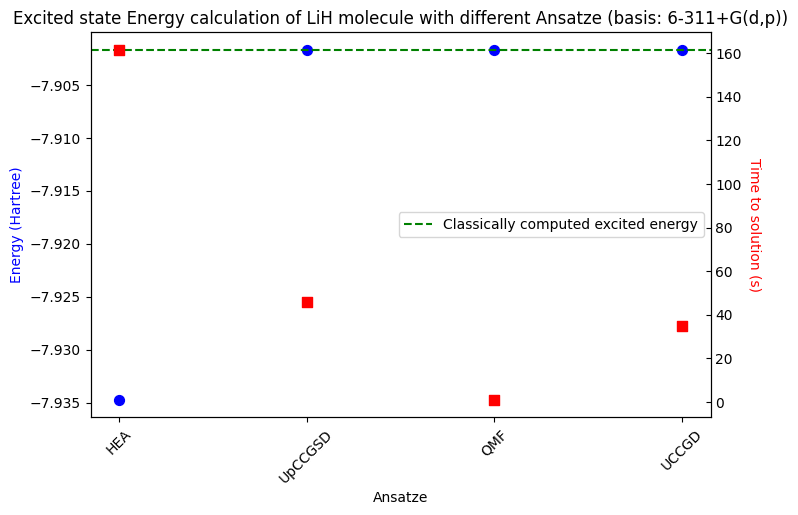

In [18]:
#Comparing VQE calculated excited state energy for different ansatze
result_t = get_excited_state_energy([x for x in BuiltInAnsatze if x is not BuiltInAnsatze.VSQS])

fig, ax = plt.subplots(figsize=(8,5))

ansatz_ls = []
runtime_ls = []
exc_e_ls = []

for key, value in result_t.items():
    ansatz_ls.append(str(key)[15:])
    runtime_ls.append(value[0])
    exc_e_ls.append(value[1])
    

# Plot the energies.
plt.title("Excited state Energy calculation of LiH molecule with different Ansatze (basis: 6-311+G(d,p))")
ax.set_xticks(range(len(ansatz_ls)), ansatz_ls, rotation=45)
ax.set_xlabel("Ansatze")
ax.set_ylabel("Energy (Hartree)", color="b")
plt.axhline(y=excited_energy_c, color="green", linestyle="--", label="Classically computed excited energy")
ax.scatter(range(len(exc_e_ls)), exc_e_ls, marker="o", s=50, color="b")



# Plot the time to solution.
ax_time = ax.twinx()
ax_time.scatter(range(len(runtime_ls)), runtime_ls, marker="s", s=50, color="r")
ax_time.set_ylabel("Time to solution (s)", color="r", rotation=270, va="bottom")

# Show the graph.
plt.tick_params(axis="both", direction="in")
ax.legend(loc='center right')
plt.show()

In [19]:
#Based on the graph, we decide to choose the QMF ansatze

# Dictionary of resources for each algorithm
algorithm_resources = dict()

# Ground state energy calculation with VQE, reference values with FCI
vqe_options = {"molecule": mol_LiH, "ansatz": BuiltInAnsatze.QMF}
vqe_solver = VQESolver(vqe_options)
vqe_solver.build()
vqe_energy = vqe_solver.simulate()
print("\n Ground Singlet state")
print(f"Quantum calculated energy = {vqe_energy}")
print(f"Classically calculated energy = {ground_energy_c}")
algorithm_resources["vqe_ground_state"] = vqe_solver.get_resources()

# First excited state energy calculation with VQE, reference values with FCI
vqe_options = {"molecule": mol_LiH_t, "ansatz": BuiltInAnsatze.QMF}
vqe_solver_t = VQESolver(vqe_options)
vqe_solver_t.build()
vqe_energy_t = vqe_solver_t.simulate()
print("\n Excited Triplet state")
print(f"Quantum calculated energy = {vqe_energy_t}")
print(f"Classically calculated energy = {excited_energy_c}")
algorithm_resources["vqe_triplet_state"] = vqe_solver_t.get_resources()


 Ground Singlet state
Quantum calculated energy = -7.985786977690026
Classically calculated energy = -7.985817059396084

 Excited Triplet state
Quantum calculated energy = -7.901680885746971
Classically calculated energy = -7.9016808857482665


In [ ]:
#5. Actually compile the code to a quantum computer

In [ ]:
import qbraid

from qbraid.runtime.qiskit import QiskitRuntimeProvider

qiskit_provider = QiskitRuntimeProvider("bwhij9hzmxt")

qiskit_provider.get_devices()

In [ ]:
from tangelo.linq.target import QiskitBackend

from qiskit import IBMQ

# Load your IBM Quantum Experience account
IBMQ.load_account("bwhij9hzmxt")  # our API key given by qBraid

# Select a quantum backend
provider = IBMQ.get_provider(hub='ibm-q') 
quantum_backend = provider.get_backend('ibmq_quito')  # device of our choice

# Dictionary of resources for each algorithm
algorithm_resources = dict()

# Set the backend to Qiskit
qiskit_backend = QiskitBackend(quantum_backend=quantum_backend)

# Ground state energy calculation with VQE, reference values with FCI
vqe_options = {"molecule": mol_LiH, "ansatz": BuiltInAnsatze.QMF, "backend": qiskit_backend}
vqe_solver = VQESolver(vqe_options)
vqe_solver.build()
vqe_energy = vqe_solver.simulate()
print("\n Ground Singlet state")
print(f"Quantum calculated energy = {vqe_energy}")
print(f"Classically calculated energy = {ground_energy_c}")
algorithm_resources["vqe_ground_state"] = vqe_solver.get_resources()

# First excited state energy calculation with VQE, reference values with FCI
vqe_options = {"molecule": mol_LiH_t, "ansatz": BuiltInAnsatze.QMF, "backend": qiskit_backend}
vqe_solver_t = VQESolver(vqe_options)
vqe_solver_t.build()
vqe_energy_t = vqe_solver_t.simulate()
print("\n Excited Triplet state")
print(f"Quantum calculated energy = {vqe_energy_t}")
print(f"Classically calculated energy = {excited_energy_c}")
algorithm_resources["vqe_triplet_state"] = vqe_solver_t.get_resources()

In [ ]:
#6. Evolving the hamiltonian of the LiH molecule over time using Trotter-Suzuki Decomposition

In [21]:
from itertools import product
from scipy.linalg import eigh, eigvals

from tangelo.linq import get_backend, Circuit, Gate
from tangelo.toolboxes.operators import QubitOperator, count_qubits
from tangelo.toolboxes.qubit_mappings.statevector_mapping import vector_to_circuit
from tangelo.toolboxes.ansatz_generator.ansatz_utils import controlled_pauliwords, trotterize

from tangelo.toolboxes.qubit_mappings.mapping_transform import fermion_to_qubit_mapping as f2q_mapping
import numpy as np
import matplotlib.pyplot as plt

In [22]:
#Evolving the LiH ground state molecule's hamiltonian using Trotter-suzuki decomposition

# Number of Krylov vectors (defining the dimension of our hamiltonian)
n_krylov = 4
# Simulation time for the evolution
tau = 0.05 
# Qubit Mapping
mapping = "jw"

backend = get_backend()

# Qubit operator for LiH
qu_op =  f2q_mapping(mol_LiH.fermionic_hamiltonian, mapping, mol_LiH.n_active_sos,
                     mol_LiH.n_active_electrons, up_then_down=False, spin=mol_LiH.spin)

# control qubit
c_q = count_qubits(qu_op)

# Operator that measures off-diagonal matrix elements i.e. 2|0><1|
zeroone = (QubitOperator(f"X{c_q}", 1) + QubitOperator(f"Y{c_q}", 1j))

# Controlled unitaries for each term in qu_op
c_qu = controlled_pauliwords(qubit_op=qu_op, control=c_q, n_qubits=5) #circuit class

# Controlled time-evolution of qu_op
c_trott = trotterize(qu_op, time=tau, n_trotter_steps=1, trotter_order=1, control=4)

# Generate multiple controlled-reference states.
reference_states = list()
reference_vecs = [[1, 1, 0, 0], [1, 0, 0, 1]]
for vec in reference_vecs:
    circ = vector_to_circuit(vec)
    #print(circ)
    gates = [Gate("C"+gate.name, target=gate.target, control=4) for gate in circ]
    reference_states += [Circuit(gates)]

# Calculate MRSQK
#generating empty 4*4 complex matrices, all entries=0
sab = np.zeros((n_krylov, n_krylov), dtype=complex)  
hab = np.zeros((n_krylov, n_krylov), dtype=complex)
fhab = np.zeros((n_krylov, n_krylov), dtype=complex)

for a, b in product(range(n_krylov), range(n_krylov)):
    # Generate Ua and Ub unitaries
    ua = reference_states[a%2] + c_trott * (a//2) if a > 1 else reference_states[a%2]
    ub = reference_states[b%2] + c_trott * (b//2) if b > 1 else reference_states[b%2]

    # Build circuit from Figure 2 for off-diagonal overlap
    hab_circuit = Circuit([Gate("H", c_q)]) + ua + Circuit([Gate("X", c_q)]) + ub
    sab[a, b] = backend.get_expectation_value(zeroone, hab_circuit) / 2
    sab[b, a] = sab[a, b].conj()

    # Hamiltonian matrix element for f(H) = e^{-i H \tau}
    fhab[a, b] = backend.get_expectation_value(zeroone, hab_circuit+c_trott.inverse())/2
    #print(f"Expectation value: {fhab[a,b]}")

    # Return statevector for faster calculation of Hamiltonian matrix elements
    _ , initial_state = backend.simulate(hab_circuit, return_statevector=True)
    for i, (term, coeff) in enumerate(qu_op.terms.items()):

        # From calculated statevector append controlled-pauliword for each term in Hamiltonian and measure zeroone
        expect = coeff*backend.get_expectation_value(zeroone, c_qu[i], initial_statevector=initial_state) / 2

        # Add term to sum
        hab[a, b] += expect

e, v = eigh(hab, sab)
print(f"The HV=SVE energies are {e}")
ground_energy_t0 = e[0]
e = eigvals(fhab, sab)
print(f"The f(H)V=SVf(E) energies are {np.arctan2(np.imag(e), np.real(e))/tau} after {tau} time")

algorithm_resources["mrsqk"] = dict()
algorithm_resources["mrsqk"]["qubit_hamiltonian_terms"] = 0
algorithm_resources["mrsqk"]["circuit_2qubit_gates"] = hab_circuit.counts.get("CNOT", 0)
algorithm_resources["mrsqk"]["n_post_terms"] = n_krylov**2


The HV=SVE energies are [-7.98581706 -7.81478044 -7.8105289  -7.25854507]
The f(H)V=SVf(E) energies are [-7.98581843 -7.25854523 -7.81053327 -7.81478619] after 0.05 time


In [23]:
#Function that evolves the LiH ground state molecule's hamiltonian for the inputted time 

def trotter_evolve(time):
    tau = time
    # Controlled time-evolution of qu_op
    c_trott = trotterize(qu_op, time=tau, n_trotter_steps=1, trotter_order=1, control=4)
    
    # Generate multiple controlled-reference states.
    reference_states = list()
    reference_vecs = [[1, 1, 0, 0], [1, 0, 0, 1]]
    for vec in reference_vecs:
        circ = vector_to_circuit(vec)
        gates = [Gate("C"+gate.name, target=gate.target, control=4) for gate in circ]
        reference_states += [Circuit(gates)]
    
    # Calculate MRSQK
    #generating empty 4*4 complex matrices, all entries=0
    sab = np.zeros((n_krylov, n_krylov), dtype=complex)  
    hab = np.zeros((n_krylov, n_krylov), dtype=complex)
    fhab = np.zeros((n_krylov, n_krylov), dtype=complex)
    
    for a, b in product(range(n_krylov), range(n_krylov)):
        # Generate Ua and Ub unitaries
        ua = reference_states[a%2] + c_trott * (a//2) if a > 1 else reference_states[a%2]
        ub = reference_states[b%2] + c_trott * (b//2) if b > 1 else reference_states[b%2]
    
        # Build circuit from Figure 2 for off-diagonal overlap
        hab_circuit = Circuit([Gate("H", c_q)]) + ua + Circuit([Gate("X", c_q)]) + ub
        sab[a, b] = backend.get_expectation_value(zeroone, hab_circuit) / 2
        sab[b, a] = sab[a, b].conj()
    
        # Hamiltonian matrix element for f(H) = e^{-i H \tau}
        fhab[a, b] = backend.get_expectation_value(zeroone, hab_circuit+c_trott.inverse())/2
        #print(f"Expectation value: {fhab[a,b]}")
    
        # Return statevector for faster calculation of Hamiltonian matrix elements
        _ , initial_state = backend.simulate(hab_circuit, return_statevector=True)
        for i, (term, coeff) in enumerate(qu_op.terms.items()):
    
            # From calculated statevector append controlled-pauliword for each term in Hamiltonian and measure zeroone
            expect = coeff*backend.get_expectation_value(zeroone, c_qu[i], initial_statevector=initial_state) / 2
    
            # Add term to sum
            hab[a, b] += expect


    e = eigvals(fhab, sab)

    ls = np.arctan2(np.imag(e), np.real(e))/tau
    return ls[0]

[-7.985817059384817, -7.985817279389614, -7.985817939667015, -7.985819039770727, -7.985820579940232, -7.985822559858191, -7.985824979547416, -7.98582783873111, -7.985831137213274, -7.985834874730411, -7.985839051019893, -7.98584366575811, -7.985848718602357, -7.985854209166005, -7.985860137049966, -7.985866501792351, -7.985873302927615, -7.985880539940408, -7.985888212287816, -7.985896319394363, 7.7220584072981895, 6.97405118167743, 6.294043364206034, 5.673165411114255, 5.104026036074585]


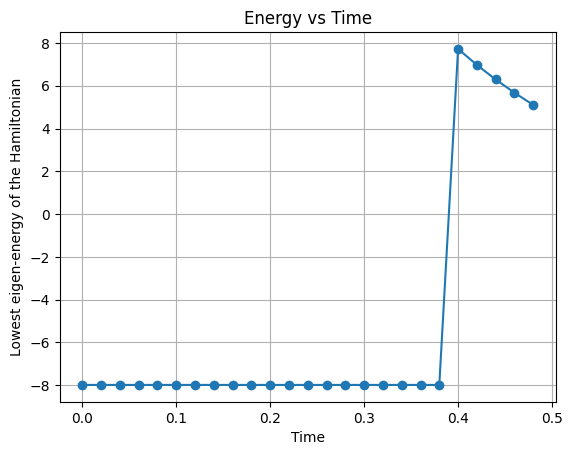

In [25]:
#plotting how the lowest eigenvalue of the hamiltonian changes over time

energy_list = []
time_list = np.arange(0,0.5,0.02)

for num in time_list:
    if num != 0:
        energy_list.append(trotter_evolve(num))
    
energy_list.insert(0, ground_energy_t0)
print(energy_list)

# Plotting
plt.plot(time_list, energy_list, marker='o')  # Use 'o' to mark each point
plt.xlabel('Time')  # Label for the x-axis
plt.ylabel('Lowest eigen-energy of the Hamiltonian')  # Label for the y-axis
plt.title('Energy vs Time')  # Title of the plot
plt.grid(True)  # Show grid
plt.show()  # Display the plot

[-7.985817059384817, -7.985817114147249, -7.985817279389614, -7.9858175547714865, -7.985817939667015, -7.985818434745726, -7.985819039770727, -7.985819754907404, -7.985820579940232, -7.985821514932827, -7.985822559858191, -7.985823714791988, -7.985824979547416, -7.985826354228339, -7.98582783873111, -7.985829433084348, -7.985831137213274, -7.985832951111763, -7.985834874730411, -7.985836908050144]


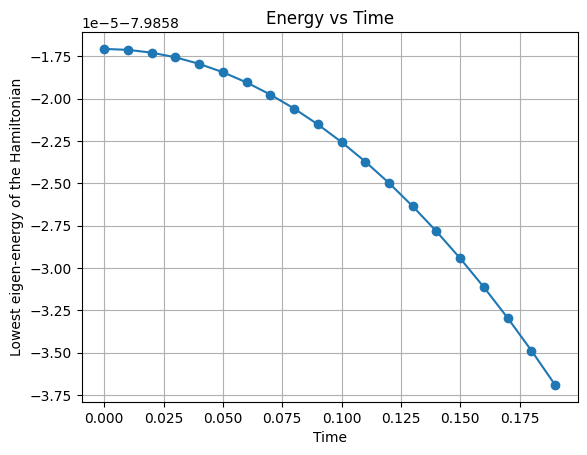

In [27]:
#plotting over shorter time period

energy_list = []
time_list = np.arange(0,0.2,0.01)

for num in time_list:
    if num != 0:
        energy_list.append(trotter_evolve(num))
    
energy_list.insert(0, ground_energy_t0)
print(energy_list)

# Plotting
plt.plot(time_list, energy_list, marker='o')  # Use 'o' to mark each point
plt.xlabel('Time')  # Label for the x-axis
plt.ylabel('Lowest eigen-energy of the Hamiltonian')  # Label for the y-axis
plt.title('Energy vs Time')  # Title of the plot
plt.grid(True)  # Show grid
plt.show()  # Display the plot

[-7.985817059384817, -7.985818434745726, -7.985822559858191, -7.9858294330717445, -7.985839051019893, -7.985851409192759, -7.985866501792722, -7.985884321733292, 7.7220584072981895, 5.976705907038902, 4.580416558722082, 3.4379905971137137, 2.485961517347026, 1.680390975253204, 0.9898944446833448, 0.39145661189747155, -0.13218400294874477, -0.5942273495514057, -1.0049400499634948, -1.372427326629644]


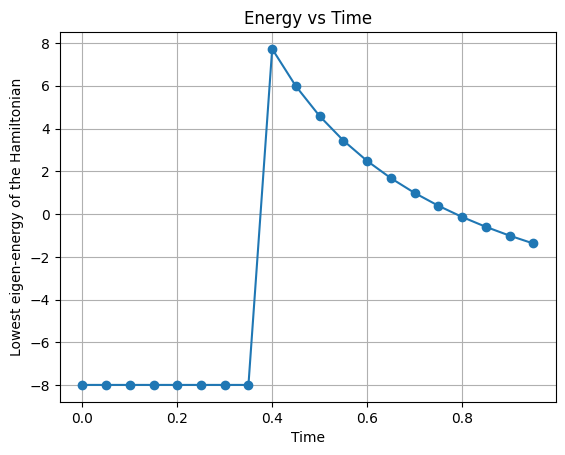

In [26]:
#plotting over longer time period

energy_list = []
time_list = np.arange(0,1,0.05)

for num in time_list:
    if num != 0:
        energy_list.append(trotter_evolve(num))
    
energy_list.insert(0, ground_energy_t0)
print(energy_list)

# Plotting
plt.plot(time_list, energy_list, marker='o')  # Use 'o' to mark each point
plt.xlabel('Time')  # Label for the x-axis
plt.ylabel('Lowest eigen-energy of the Hamiltonian')  # Label for the y-axis
plt.title('Energy vs Time')  # Title of the plot
plt.grid(True)  # Show grid
plt.show()  # Display the plot

In [ ]:
#7. Visualizing the Molecular Orbitals

In [ ]:
!pip install py3Dmol

In [ ]:
#generating cube files that can create 3D visualization of molecular orbitals

from pyscf.tools import cubegen
from tangelo.toolboxes.molecular_computation.integral_solver_pyscf import mol_to_pyscf

pyscf_mol_LiH = mol_to_pyscf(mol_LiH, mol_LiH.basis, mol_LiH.symmetry, mol_LiH.ecp)
pyscf_mol_LiH_t = mol_to_pyscf(mol_LiH_t, mol_LiH_t.basis, mol_LiH_t.symmetry, mol_LiH_t.ecp)


# Output cube files for active orbitals of ground st LiH
for i in [1, 2]:
    cubegen.orbital(pyscf_mol_LiH , f'liH_{i}_ground.cube', mol_LiH.mean_field.mo_coeff[:, i])

# Output cube files for active orbitals of excited st LiH
for i in [1, 2, 3]:
    cubegen.orbital(pyscf_mol_LiH , f'liH_{i}_excite.cube', mol_LiH_t.mean_field.mo_coeff[:, i])

In [ ]:
# Visualization of 1st orbital of LiH ground state
import py3Dmol
view = py3Dmol.view()

cube_data = open("liH_1_ground.cube", "r").read()
    
# Add the cube data as surface (molecular orbital)
view.addVolumetricData(cube_data, "cube", {'isoval':0.03, 'opacity':0.65, 'color':"blue"})
view.addVolumetricData(cube_data, "cube", {'isoval':0.04, 'opacity':0.75, 'color':"blue"})
view.addVolumetricData(cube_data, "cube", {'isoval':0.05, 'opacity':0.85, 'color':"blue"})

view.addVolumetricData(cube_data, "cube", {'isoval':-0.03, 'opacity':0.65, 'color':"red"})
view.addVolumetricData(cube_data, "cube", {'isoval':-0.04, 'opacity':0.75, 'color':"red"})
view.addVolumetricData(cube_data, "cube", {'isoval':-0.05, 'opacity':0.85, 'color':"red"})

# Set background and visualization style
#view.setBackgroundColor('white')
view.setStyle({'stick':{}})
view.zoomTo()

# Display the cube file
print("Visualization of Active molecular orbital of the LiH ground state")
view.show()

In [ ]:
# Visualization of 2nd orbital of LiH ground state

view = py3Dmol.view()

cube_data = open("liH_2_ground.cube", "r").read()
    
# Add the cube data as surface (molecular orbital)
view.addVolumetricData(cube_data, "cube", {'isoval':0.03, 'opacity':0.65, 'color':"blue"})
view.addVolumetricData(cube_data, "cube", {'isoval':0.04, 'opacity':0.75, 'color':"blue"})
view.addVolumetricData(cube_data, "cube", {'isoval':0.05, 'opacity':0.85, 'color':"blue"})

view.addVolumetricData(cube_data, "cube", {'isoval':-0.03, 'opacity':0.65, 'color':"red"})
view.addVolumetricData(cube_data, "cube", {'isoval':-0.04, 'opacity':0.75, 'color':"red"})
view.addVolumetricData(cube_data, "cube", {'isoval':-0.05, 'opacity':0.85, 'color':"red"})

# Set background and visualization style
#view.setBackgroundColor('white')
view.setStyle({'stick':{}})
view.zoomTo()

# Display the cube file
print("Visualization of Active molecular orbital of the LiH ground state")
view.show()

In [ ]:
# Visualization of 1st orbital of LiH excited state

view = py3Dmol.view()

cube_data = open("liH_1_excited.cube", "r").read()
    
# Add the cube data as surface (molecular orbital)
view.addVolumetricData(cube_data, "cube", {'isoval':0.03, 'opacity':0.65, 'color':"blue"})
view.addVolumetricData(cube_data, "cube", {'isoval':0.04, 'opacity':0.75, 'color':"blue"})
view.addVolumetricData(cube_data, "cube", {'isoval':0.05, 'opacity':0.85, 'color':"blue"})

view.addVolumetricData(cube_data, "cube", {'isoval':-0.03, 'opacity':0.65, 'color':"red"})
view.addVolumetricData(cube_data, "cube", {'isoval':-0.04, 'opacity':0.75, 'color':"red"})
view.addVolumetricData(cube_data, "cube", {'isoval':-0.05, 'opacity':0.85, 'color':"red"})

# Set background and visualization style
#view.setBackgroundColor('white')
view.setStyle({'stick':{}})
view.zoomTo()

# Display the cube file
print("Visualization of Active molecular orbital of the LiH excited state")
view.show()

In [ ]:
# Visualization of 2nd orbital of LiH excited state

view = py3Dmol.view()

cube_data = open("liH_2_excited.cube", "r").read()
    
# Add the cube data as surface (molecular orbital)
view.addVolumetricData(cube_data, "cube", {'isoval':0.03, 'opacity':0.65, 'color':"blue"})
view.addVolumetricData(cube_data, "cube", {'isoval':0.04, 'opacity':0.75, 'color':"blue"})
view.addVolumetricData(cube_data, "cube", {'isoval':0.05, 'opacity':0.85, 'color':"blue"})

view.addVolumetricData(cube_data, "cube", {'isoval':-0.03, 'opacity':0.65, 'color':"red"})
view.addVolumetricData(cube_data, "cube", {'isoval':-0.04, 'opacity':0.75, 'color':"red"})
view.addVolumetricData(cube_data, "cube", {'isoval':-0.05, 'opacity':0.85, 'color':"red"})

# Set background and visualization style
#view.setBackgroundColor('white')
view.setStyle({'stick':{}})
view.zoomTo()

# Display the cube file
print("Visualization of Active molecular orbital of the LiH excited state")
view.show()

In [ ]:
# Visualization of 3rd orbital of LiH excited state

view = py3Dmol.view()

cube_data = open("liH_3_excited.cube", "r").read()
    
# Add the cube data as surface (molecular orbital)
view.addVolumetricData(cube_data, "cube", {'isoval':0.03, 'opacity':0.65, 'color':"blue"})
view.addVolumetricData(cube_data, "cube", {'isoval':0.04, 'opacity':0.75, 'color':"blue"})
view.addVolumetricData(cube_data, "cube", {'isoval':0.05, 'opacity':0.85, 'color':"blue"})

view.addVolumetricData(cube_data, "cube", {'isoval':-0.03, 'opacity':0.65, 'color':"red"})
view.addVolumetricData(cube_data, "cube", {'isoval':-0.04, 'opacity':0.75, 'color':"red"})
view.addVolumetricData(cube_data, "cube", {'isoval':-0.05, 'opacity':0.85, 'color':"red"})

# Set background and visualization style
#view.setBackgroundColor('white')
view.setStyle({'stick':{}})
view.zoomTo()

# Display the cube file
print("Visualization of Active molecular orbital of the LiH excited state")
view.show()